In [8]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
X = pd.read_csv('../data/processed/X_processed.csv')
y = pd.read_csv('../data/processed/y_processed.csv').squeeze()  # convert to Series

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Scale Numeric Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Save Scaler
joblib.dump(scaler, '../model/scaler.pkl')

['../model/scaler.pkl']

In [13]:
#  Initialize Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Decision Tree': DecisionTreeClassifier(),
    }

In [14]:
#  Train and Evaluate Models
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append({'Model': name, 'Accuracy': acc})
    
    print(f"\n🔍 Model: {name}")
    print("Accuracy:", acc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔍 Model: Logistic Regression
Accuracy: 0.9343683330450325

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90     24608
           1       0.91      0.99      0.95     44764

    accuracy                           0.93     69372
   macro avg       0.95      0.91      0.93     69372
weighted avg       0.94      0.93      0.93     69372

Confusion Matrix:
 [[20280  4328]
 [  225 44539]]

🔍 Model: Random Forest
Accuracy: 0.9403505737185032

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91     24608
           1       0.94      0.97      0.95     44764

    accuracy                           0.94     69372
   macro avg       0.94      0.93      0.93     69372
weighted avg       0.94      0.94      0.94     69372

Confusion Matrix:
 [[21640  2968]
 [ 1170 43594]]

🔍 Model: Decision Tree
Accuracy: 0.9269734186703569

Classification Report:
       

In [15]:
#  Save the Best Model 
best_model_name = max(results, key=lambda x: x['Accuracy'])['Model']
best_model = models[best_model_name]
joblib.dump(best_model, f'../model/{best_model_name.replace(" ", "_").lower()}.pkl')

print(f"\n✅ Best Model: {best_model_name} saved.")


✅ Best Model: Random Forest saved.


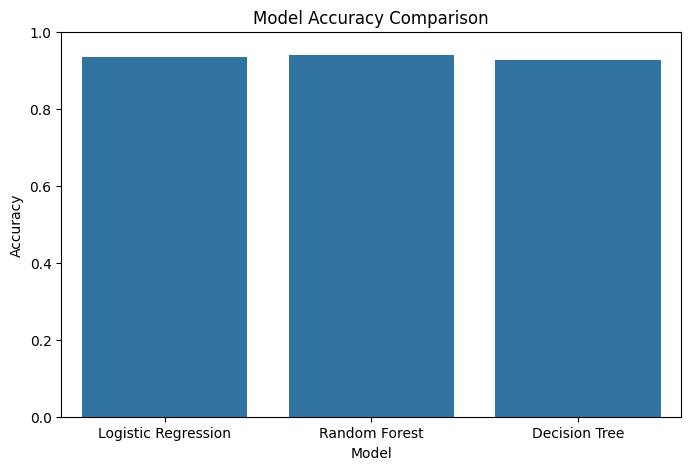

In [16]:
#  Plot Accuracy Comparison
results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.savefig('../eda/model_accuracy_comparison.png')
plt.show()
